In [1]:
import nbsetup
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from references.sparc import galaxy_list
from models.load import load_sparc

In [2]:
from models.space import Space
from models.galaxy import Galaxy
from models.sparc import generate_profiles, generate_galaxy, COLOR_SCHEME

In [6]:
uid = 'DDO161'
prof = generate_profiles()[uid]

In [80]:
sim = generate_galaxy(prof, space_points=2000, calc_points=20, cp=nbsetup.cp)

completed in 3.04 seconds


In [2]:
#simulations = load_sparc(galaxy_list())

In [3]:
unity_mass_ratio = {'gas': 1, 'disk': 1, 'bul': 1}

def plot_sparc(self, ax=None):
    
    for k in ('Vobs', 'Vgas', 'Vdisk', 'Vbul'):
        if k != 'Vbul' or self.profile.is_bul:
            sns.scatterplot(x=self.profile.rotmass_df['R'], y=self.profile.rotmass_df[k], label=k, ax=ax, color=COLOR_SCHEME[k[1:]])
    
    df = self.dataframe(mass_ratios=unity_mass_ratio)
    
    for k in self.mass_labels:
        cdf = df.query("component=='%s'" % k)
        vel2 = (cdf['rd']*cdf['x_vec'])
        g = sns.lineplot(x=cdf['rd'], y=np.sign(vel2)*(np.abs(vel2)**0.5), ax=ax, label=k, color=COLOR_SCHEME[k])
        
    g.set(title=self.profile.sparc_dict['Vflat'])

In [201]:
def glog(obs, r):
    return np.log10(obs**2/r)

def plot_line(self):
    df = self.profile.rotmass_df
    df['log(gobs)'] = glog(df['Vobs'], df['R'])
    args, cov, func = curve_fit(self)
    df['log(gbar)'] = glog(func(df['R'], *args), df['R'])
    sns.lineplot(y=df['log(gobs)'], x=df['log(gbar)'])
    return df



SPARC_MASS_RATIOS = {'gas': 1, 'disk': 0.5, 'bul': 0.7}

def velocity(R, F):
    return np.sign(F)*(np.abs(R*F)**0.5)



BOUNDS = [[0.6,0],[0.7,100]]

def curve_fit(self):
    
    # combined masses dataframe
    cdf = self.dataframe(mass_ratios=SPARC_MASS_RATIOS, combined=True)
    
    def f(r, gamma, tau):
        al = 0.25
        ep = 2.5
        inulled = np.interp(r, cdf['rd'], cdf['x_abs']-cdf['x_vec'])
        iforce = np.interp(r, cdf['rd'], cdf['x_vec'])
        nforce = gamma*iforce/(1+((tau+ep*inulled))**al)
        return velocity(r, nforce)
    
    def f(r, gamma, tau):
        inulled = np.interp(r, cdf['rd'], cdf['x_abs']-cdf['x_vec'])
        iforce = np.interp(r, cdf['rd'], cdf['x_vec'])
        nforce = iforce*(0.6**((inulled+tau)**0.2))*30
        return velocity(r, nforce)
    
    # rotmass reference dataframe
    rdf = self.profile.rotmass_df
    leng = int(len(rdf['R'])*0.9)
    bounds = BOUNDS
    popt, pcov = sp.optimize.curve_fit(f, rdf['R'][:leng], rdf['Vobs'][:leng], bounds=BOUNDS)
    return popt, pcov, f

array([6.50000000e-01, 8.15165868e-14])

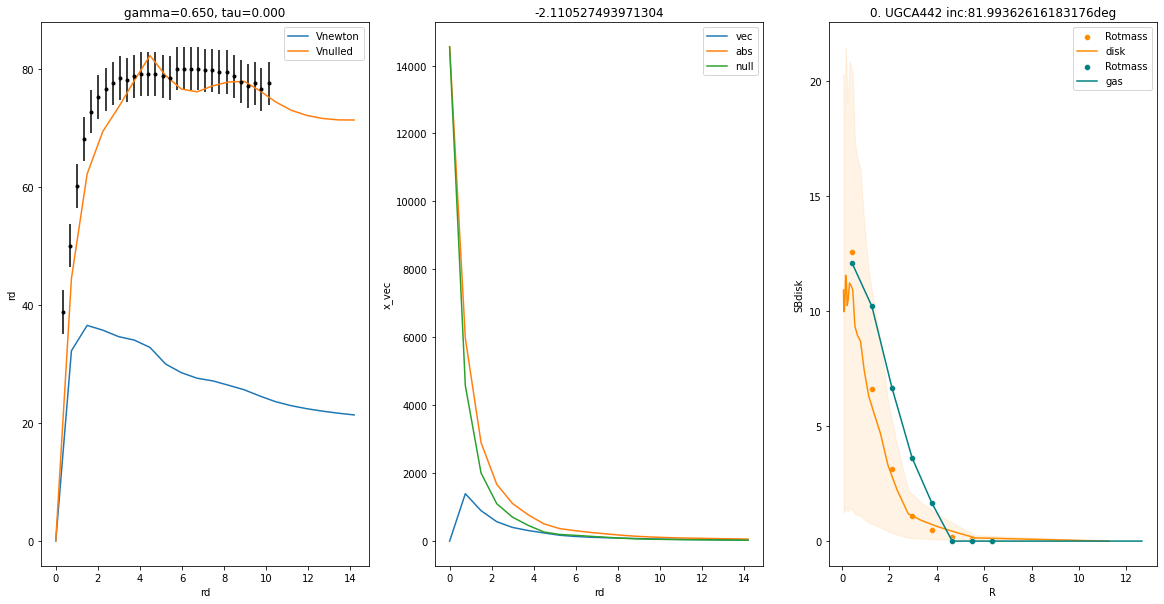

In [206]:
def plot_velocities(self, axes=None):
    if axes is None:
        fig, axes = plt.subplots(1,3,figsize=(20,10))
    
    cdf = self.dataframe(mass_ratios=SPARC_MASS_RATIOS, combined=True)
    sns.lineplot(data=cdf, x='rd', y='x_vec', ax=axes[1], label='vec')
    sns.lineplot(data=cdf, x='rd', y='x_abs', ax=axes[1], label='abs')
    q = sns.lineplot(x=cdf['rd'], y=cdf['x_abs']-cdf['x_vec'], ax=axes[1], label='null')
    q.set(title=self.profile.sparc_dict['Inc']-self.profile.inc_used)
    
    #sns.scatterplot(data=self.profile.rotmass_df, x='R', y='Vobs', color='black', label='Vobs', ax=axes[0])
    axes[0].errorbar(self.profile.rotmass_dict['R'], self.profile.rotmass_dict['Vobs'], yerr=self.profile.rotmass_dict['errV'], fmt='.k')
    sns.lineplot(data=cdf, x='rd', y=velocity(cdf['rd'],cdf['x_vec']), label='Vnewton', ax=axes[0])
    
    
    args, cov, func = curve_fit(self)
    r = cdf['rd']
    g = sns.lineplot(x=r, y=func(r, *args), label='Vnulled', ax=axes[0])    
    g.set(title=("gamma=%.3f, tau=%.3f" % tuple(args)))
    sim.profile.plot(axes[2])
    return args

plot_velocities(all_simulations['UGC08490'])

In [32]:
uids = ['DDO064', 'DDO161', 'ESO079-G014', 'ESO116-G012', 'F568-3',
       'F568-V1', 'F574-1', 'F583-1', 'F583-4', 'NGC0024', 'NGC1003',
       'NGC1090', 'NGC2403', 'NGC2903', 'NGC2998', 'NGC3109', 'NGC3198',
       'NGC3521', 'NGC3741', 'NGC3893', 'NGC3917', 'NGC3953', 'NGC3972',
       'NGC3992', 'NGC4088', 'NGC4100', 'NGC4559', 'NGC5055', 'NGC5371',
       'NGC5585', 'NGC6503', 'NGC7793', 'UGC00128', 'UGC00191',
       'UGC00731', 'UGC04325', 'UGC04499', 'UGC05005', 'UGC05414',
       'UGC05721', 'UGC05750', 'UGC06399', 'UGC06446', 'UGC06917',
       'UGC06930', 'UGC06983', 'UGC07323', 'UGC07399', 'UGC07524',
       'UGC07603', 'UGC08490', 'UGC10310', 'UGC11820', 'UGC12632',
       'UGC12732', 'UGCA442']

In [33]:
all_simulations = load_sparc(uids)

/Users/timjdavey/Projects/darkness/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


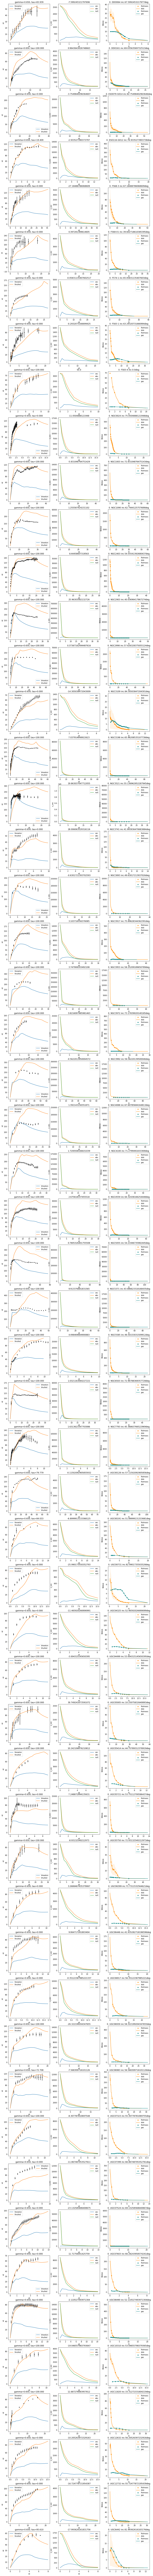

In [207]:
count = len(all_simulations)
fig, axes = plt.subplots(count, 3, figsize=(15, 5*count))
params = []
for i, sim in enumerate(list(all_simulations.values())[:count]):
    
    try:
        params.append(plot_velocities(sim, axes[i]))
    except RuntimeError:
        pass

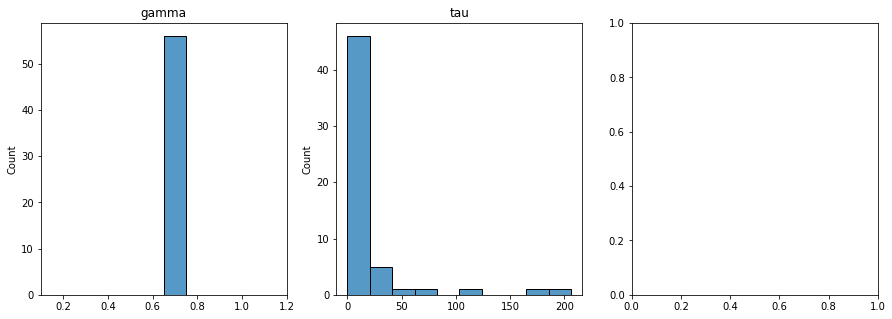

In [185]:
fig, axes = plt.subplots(1,3,figsize=(15,5))
params = np.array(params)
for i, label in enumerate(('gamma', 'tau')):
    g = sns.histplot(params[:,i], bins=10, ax=axes[i])
    g.set(title=label)